In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
path = '/content/drive/MyDrive/4142/dataset.csv'
df = pd.read_csv(path)
provinces = ['AB', 'BC', 'MB', 'NB', 'NL' , 'ON', 'PE', 'QC', 'SK', ]
df = df.drop('Surrogate Keys', axis = 1)
df = df.drop_duplicates(subset=['location','date'],keep='first')
display(df)

,location,date,Tm Average,Tx Average,Tn Average,P Average,S_G Average,total,house,land
0,AB,2012-01-01,-6.923002,11.398783,-33.632209,12.465167,11.258989,93.2,93.2,93.2
1,AB,2012-02-01,-6.292396,8.171374,-24.513714,13.758041,12.343840,93.2,93.1,93.4
2,AB,2012-03-01,-0.904317,14.305485,-18.870144,21.922648,10.703824,93.6,93.6,93.5
3,AB,2012-04-01,4.395967,22.516142,-9.429845,38.454894,10.295377,93.7,93.8,93.8
4,AB,2012-05-01,9.505343,26.094101,-3.233266,49.041344,10.572356,93.9,93.9,93.9
...,...,...,...,...,...,...,...,...,...,...
1335,SK,2022-10-01,6.008974,23.820513,-8.535897,15.883855,9.032755,106.9,112.7,97.6
1336,SK,2022-11-01,-8.506410,7.975641,-27.276923,25.350522,10.794129,106.5,112.2,97.5
1337,SK,2022-12-01,-18.433766,-0.606494,-37.527273,19.379749,18.619259,106.2,111.7,97.5
1338,SK,2023-01-01,-11.808369,2.825470,-29.768421,10.146588,20.413631,106.2,111.8,97.5


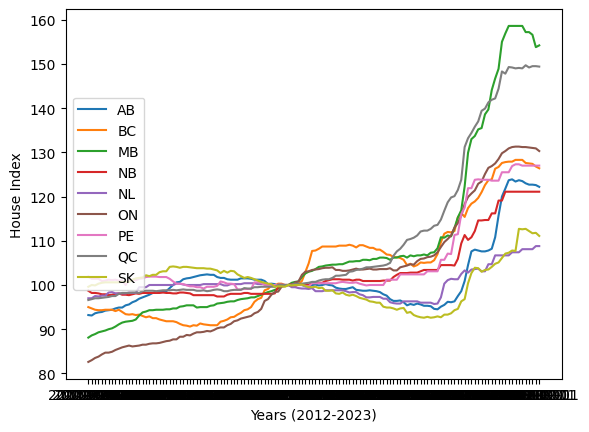

In [4]:
for code in provinces:
    country_data = df[df['location']==code]
    plt.plot(country_data['date'], country_data['house'], label=code)

plt.legend(loc='center left')

plt.xlabel('Years (2012-2023)')
plt.ylabel('House Index')
plt.show()

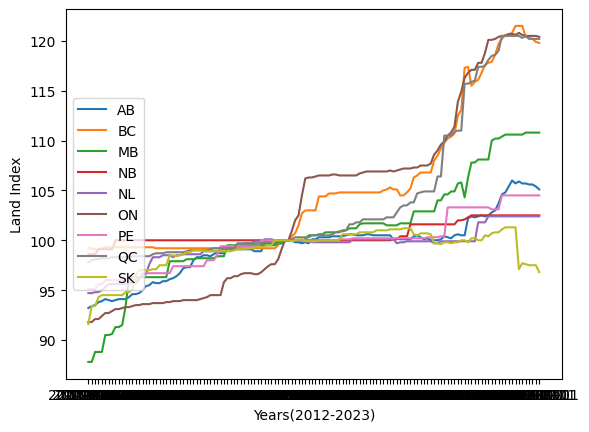

In [5]:
for code in provinces:
    country_data = df[df['location']==code]
    plt.plot(country_data['date'], country_data['land'], label=code)

plt.legend(loc='center left')

plt.xlabel('Years(2012-2023)')
plt.ylabel('Land Index')
plt.show()

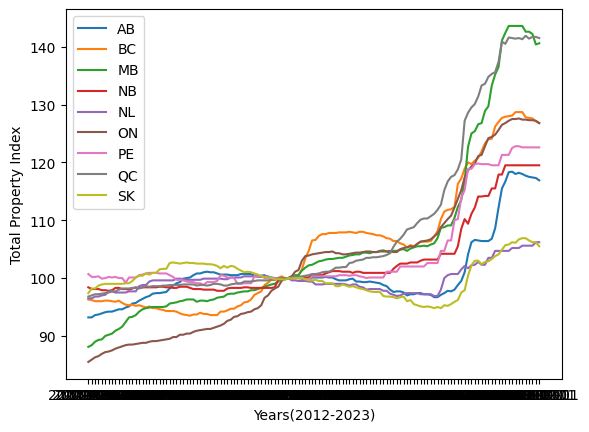

In [6]:
for code in provinces:
    country_data = df[df['location']==code]
    plt.plot(country_data['date'], country_data['total'], label=code)

plt.legend(loc='upper left')

plt.xlabel('Years(2012-2023)')
plt.ylabel('Total Property Index')
plt.show()

In [7]:
#encoding provinces
le = LabelEncoder()
df['location'] = le.fit_transform(df['location'])
df.location.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [8]:
display(df)

,location,date,Tm Average,Tx Average,Tn Average,P Average,S_G Average,total,house,land
0,0,2012-01-01,-6.923002,11.398783,-33.632209,12.465167,11.258989,93.2,93.2,93.2
1,0,2012-02-01,-6.292396,8.171374,-24.513714,13.758041,12.343840,93.2,93.1,93.4
2,0,2012-03-01,-0.904317,14.305485,-18.870144,21.922648,10.703824,93.6,93.6,93.5
3,0,2012-04-01,4.395967,22.516142,-9.429845,38.454894,10.295377,93.7,93.8,93.8
4,0,2012-05-01,9.505343,26.094101,-3.233266,49.041344,10.572356,93.9,93.9,93.9
...,...,...,...,...,...,...,...,...,...,...
1335,8,2022-10-01,6.008974,23.820513,-8.535897,15.883855,9.032755,106.9,112.7,97.6
1336,8,2022-11-01,-8.506410,7.975641,-27.276923,25.350522,10.794129,106.5,112.2,97.5
1337,8,2022-12-01,-18.433766,-0.606494,-37.527273,19.379749,18.619259,106.2,111.7,97.5
1338,8,2023-01-01,-11.808369,2.825470,-29.768421,10.146588,20.413631,106.2,111.8,97.5


In [9]:
#checking for null values
df.isnull().sum()

location       0
date           0
Tm Average     0
Tx Average     0
Tn Average     0
P Average      0
S_G Average    0
total          0
house          0
land           0
dtype: int64

In [10]:
#Scaling selected features
from sklearn.preprocessing import StandardScaler

df[['Tm Average',	'Tx Average',	'Tn Average'	,'P Average'	,'S_G Average'	,'total'	,'house','land']] = StandardScaler().fit_transform(df[[	'Tm Average',	'Tx Average',	'Tn Average'	,'P Average'	,'S_G Average'	,'total'	,'house','land']]) 

In [11]:
df['date'] = pd.to_datetime(df['date'])

df['date'] = (df['date'] - np.datetime64('2012-01-01')) / np.timedelta64(1, 'D')

In [12]:
display(df)

,location,date,Tm Average,Tx Average,Tn Average,P Average,S_G Average,total,house,land
0,0,0.0,-1.130965,-0.777444,-1.921693,-1.471745,-0.233325,-0.997331,-0.879138,-1.433410
1,0,31.0,-1.066969,-1.122694,-1.188113,-1.436229,-0.102879,-0.997331,-0.887439,-1.398121
2,0,60.0,-0.520172,-0.466502,-0.734090,-1.211944,-0.300081,-0.957656,-0.845937,-1.380476
3,0,91.0,0.017715,0.411828,0.025378,-0.757797,-0.349194,-0.947737,-0.829336,-1.327543
4,0,121.0,0.536228,0.794578,0.523891,-0.466984,-0.315889,-0.927900,-0.821036,-1.309899
...,...,...,...,...,...,...,...,...,...,...
1335,8,3926.0,0.181407,0.551362,0.097296,-1.377832,-0.501016,0.361542,0.739436,-0.657056
1336,8,3957.0,-1.291653,-1.143633,-1.410412,-1.117779,-0.289222,0.321867,0.697934,-0.674701
1337,8,3987.0,-2.299108,-2.061701,-2.235049,-1.281799,0.651701,0.292111,0.656432,-0.674701
1338,8,4018.0,-1.626745,-1.694569,-1.610852,-1.535437,0.867464,0.292111,0.664732,-0.674701


**Linear regression**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop("total", axis=1)
y = df["total"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Due to the classification does work for our dataset, linear regression analysis will be used to analyze the data.

In [14]:
# create model
model = LinearRegression()
# train model
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# prediction results
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("The Result of linear regression:")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

The Result of linear regression:
Mean Squared Error: 0.004258824681280245
R^2 Score: 0.9950224967923756
